In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

## Potential Donors in Bath, NH

In [273]:
bath = pd.read_csv("fec_donor_bath.csv")

In [274]:
bath.head()

,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00401224,ACTBLUE,2021,30R,202102049425519830,11AI,SA11AI_369917444,1498693,NaN,IND,...,F3X,4020920211123477024,t,EARMARKED FOR TEXAS ORGANIZING PROJECT POLITIC...,2022,SA,NaN,4031520211257321704,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
1,C00401224,ACTBLUE,2021,30R,202102049425519830,11AI,SA11AI_369917587,1498693,NaN,IND,...,F3X,4020920211123477024,t,CONTRIBUTION TO ACTBLUE,2022,SA,NaN,4031520211257321705,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
2,C00401224,ACTBLUE,2021,30R,202102049425558759,11AI,SA11AI_371769016,1498693,NaN,IND,...,F3X,4020920211123477024,t,EARMARKED FOR FRIENDS OF BERNIE SANDERS (C0041...,2022,SA,NaN,4031520211257530491,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
3,C00401224,ACTBLUE,2021,MY,202107319458319329,11AI,SA11AI_371884501,1533121,NaN,IND,...,F3X,4080120211324274388,t,EARMARKED FOR DEMOCRATIC NATIONAL COMMITTEE (C...,2022,SA,NaN,4082520211343947337,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
4,C00401224,ACTBLUE,2021,MY,202107319457398076,11AI,SA11AI_374980237,1533121,NaN,IND,...,F3X,4080120211324274388,t,EARMARKED FOR DEMOCRATIC NATIONAL COMMITTEE (C...,2022,SA,NaN,4082520211345817001,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...


In [275]:
contributor = bath['contributor_name'].unique()
print(contributor)

['GALL, AMY' 'GREEN, CHARLIE' 'FOURNIER, ROGER' 'BOUTIN, JEANNETTE'
 'HOMER, KELLY' 'ROWLEY, SUSAN']


In [276]:
bath['contributor_name'].value_counts()

HOMER, KELLY         5
ROWLEY, SUSAN        5
GALL, AMY            2
GREEN, CHARLIE       1
FOURNIER, ROGER      1
BOUTIN, JEANNETTE    1
Name: contributor_name, dtype: int64

In [277]:
homer = bath[bath['contributor_name'] == 'HOMER, KELLY']
rowley = bath[bath['contributor_name'] == 'ROWLEY, SUSAN']
gall = bath[bath['contributor_name'] == 'GALL, AMY']
green = bath[bath['contributor_name'] == 'GREEN, CHARLIE']
boutin = bath[bath['contributor_name'] == 'BOUTIN, JEANNETTE']
fournier = bath[bath['contributor_name'] == 'FOURNIER, ROGER']

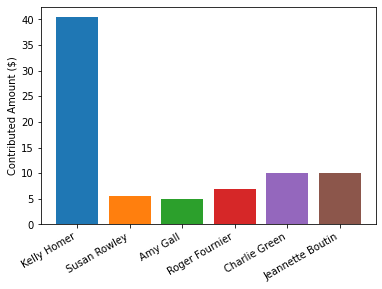

In [278]:
fig, ax = plt.subplots()
ax.bar("Kelly Homer", homer['contribution_receipt_amount'].mean())
ax.bar("Susan Rowley", rowley['contribution_receipt_amount'].mean())
ax.bar("Amy Gall", gall['contribution_receipt_amount'].mean())
ax.bar("Roger Fournier", fournier['contribution_receipt_amount'].mean())
ax.bar("Charlie Green", green['contribution_receipt_amount'].mean())
ax.bar("Jeannette Boutin", boutin['contribution_receipt_amount'].mean())
ax.set_ylabel("Contributed Amount ($)")
plt.xticks(rotation = 30, ha = 'right')
plt.show()

In [279]:
#explore the past average giving amount of donors
amount_per_donor = bath.groupby('contributor_name').contribution_receipt_amount.mean()
amount_per_donor

contributor_name
BOUTIN, JEANNETTE    10.000
FOURNIER, ROGER       7.000
GALL, AMY             5.000
GREEN, CHARLIE       10.000
HOMER, KELLY         40.400
ROWLEY, SUSAN         5.498
Name: contribution_receipt_amount, dtype: float64

In [280]:
#add new column for Past Average, Mininum, and Maximum Giving Amount by Donors
bath['Number of Past Donations'] = bath.groupby('contributor_name').contribution_receipt_amount.transform('count')
bath['Average Past Giving Amount'] = bath.groupby('contributor_name').contribution_receipt_amount.transform('mean')
bath['Past Minimum Giving Amount'] = bath.groupby('contributor_name').contribution_receipt_amount.transform('min')
bath['Past Maximum Giving Amount'] = bath.groupby('contributor_name').contribution_receipt_amount.transform('max')

In [281]:
#remove unnessary columns 
bath = bath.drop(columns= ['contribution_receipt_amount','report_type','recipient_committee_type',
                               'contributor_prefix','image_number','line_number','contributor_aggregate_ytd',
                               'file_number','transaction_id','committee_name.1','entity_type','unused_contbr_id',
                               'recipient_committee_org_type','recipient_committee_designation',
                               'contributor_first_name','contributor_middle_name','contributor_last_name',
                               'contributor_suffix','contributor_street_2','contributor_id','receipt_type',
                               'receipt_type_desc','receipt_type_full','memo_code','memo_code_full',
                               'contribution_receipt_date','candidate_id','candidate_name','candidate_first_name',
                               'candidate_last_name','candidate_middle_name','candidate_prefix',
                               'candidate_suffix','candidate_office','candidate_office_full',
                               'candidate_office_state','candidate_office_state_full','candidate_office_district',
                               'conduit_committee_id','conduit_committee_name','conduit_committee_street1',
                               'conduit_committee_street2','conduit_committee_city','conduit_committee_state',
                               'conduit_committee_zip','donor_committee_name',
                               'national_committee_nonfederal_account','election_type','election_type_full',
                               'fec_election_type_desc','fec_election_year','amendment_indicator',
                               'amendment_indicator_desc','schedule_type_full','load_date','original_sub_id',
                               'back_reference_transaction_id','back_reference_schedule_name','filing_form',
                               'link_id','is_individual','memo_text','two_year_transaction_period',
                               'schedule_type','increased_limit','sub_id','pdf_url','line_number_label'])

In [282]:
#drop duplicates donors 
bath = bath.drop_duplicates(subset=['contributor_name'])

In [283]:
print(bath)

  committee_id committee_name  report_year entity_type_desc  \
0    C00401224        ACTBLUE         2021       INDIVIDUAL   
2    C00401224        ACTBLUE         2021       INDIVIDUAL   
3    C00401224        ACTBLUE         2021       INDIVIDUAL   
4    C00401224        ACTBLUE         2021       INDIVIDUAL   
5    C00401224        ACTBLUE         2021       INDIVIDUAL   
8    C00401224        ACTBLUE         2021       INDIVIDUAL   

    contributor_name   contributor_street_1 contributor_city  \
0          GALL, AMY          723 LISBON RD             BATH   
2     GREEN, CHARLIE          23 ABBOTT AVE             BATH   
3    FOURNIER, ROGER         90 MONROE ROAD             BATH   
4  BOUTIN, JEANNETTE    136 AMMONOOSUC AVE              BATH   
5       HOMER, KELLY  192 WHITE MOUNTAIN RD             BATH   
8      ROWLEY, SUSAN            6 HILL ROAD             BATH   

  contributor_state  contributor_zip     contributor_employer  \
0                NH             3740        

In [284]:
bath.to_csv("bath_donor_list.csv",index=False)

## Potential Donors in Benton, NH

In [285]:
benton = pd.read_csv("fec_donor_benton.csv")

In [286]:
benton.head()

,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00401224,ACTBLUE,2021,30R,202102049425307052,11AI,SA11AI_370397833,1498693,NaN,IND,...,F3X,4020920211123477024,t,EARMARKED FOR DEMOCRATIC ACTION (C00562983),2022,SA,NaN,4031520211256158371,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
1,C00401224,ACTBLUE,2021,30R,202102049425594002,11AI,SA11AI_366764045,1498693,NaN,IND,...,F3X,4020920211123477024,t,EARMARKED FOR DCCC (C00000935),2022,SA,NaN,4031520211257714219,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
2,C00401224,ACTBLUE,2021,30R,202102049425594002,11AI,SA11AI_366764044,1498693,NaN,IND,...,F3X,4020920211123477024,t,CONTRIBUTION TO ACTBLUE,2022,SA,NaN,4031520211257714220,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
3,C00401224,ACTBLUE,2021,MY,202107319458729375,11AI,SA11AI_373085399,1533121,NaN,IND,...,F3X,4080120211324274388,t,CONTRIBUTION TO ACTBLUE,2022,SA,NaN,4082520211344695280,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
4,C00401224,ACTBLUE,2021,MY,202107319458729376,11AI,SA11AI_373085400,1533121,NaN,IND,...,F3X,4080120211324274388,t,EARMARKED FOR DCCC (C00000935),2022,SA,NaN,4082520211344695281,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...


In [287]:
contributor = benton['contributor_name'].unique()
print(contributor)

['BOUTIN, MELINDA' 'HASSELL, JOYCE K']


In [288]:
benton['contributor_name'].value_counts()

HASSELL, JOYCE K    12
BOUTIN, MELINDA      6
Name: contributor_name, dtype: int64

In [289]:
hassel = benton[benton['contributor_name'] == 'HASSELL, JOYCE K']
boutin = benton[benton['contributor_name'] == 'BOUTIN, MELINDA']

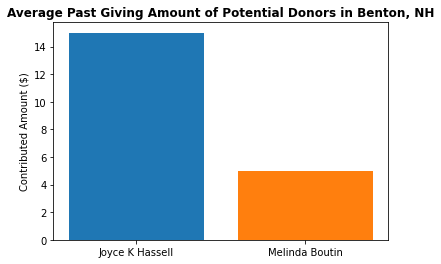

In [290]:
fig, ax = plt.subplots()
ax.bar("Joyce K Hassell", hassel['contribution_receipt_amount'].mean())
ax.bar("Melinda Boutin", boutin['contribution_receipt_amount'].mean())
ax.set_ylabel("Contributed Amount ($)")
ax.set_title("Average Past Giving Amount of Potential Donors in Benton, NH",weight='bold')
plt.show()

In [291]:
#add new column for Past Average Giving Amount
benton['Number of Past Donations'] = benton.groupby('contributor_name').contribution_receipt_amount.transform('count')
benton['Average Past Giving Amount'] = benton.groupby('contributor_name').contribution_receipt_amount.transform('mean')
benton['Past Minimum Giving Amount'] = benton.groupby('contributor_name').contribution_receipt_amount.transform('min')
benton['Past Maximum Giving Amount'] = benton.groupby('contributor_name').contribution_receipt_amount.transform('max')

In [292]:
#remove unnessary columns 
benton = benton.drop(columns= ['contribution_receipt_amount','report_type','recipient_committee_type',
                               'contributor_prefix','image_number','line_number','contributor_aggregate_ytd',
                               'file_number','transaction_id','committee_name.1','entity_type','unused_contbr_id',
                               'recipient_committee_org_type','recipient_committee_designation',
                               'contributor_first_name','contributor_middle_name','contributor_last_name',
                               'contributor_suffix','contributor_street_2','contributor_id','receipt_type',
                               'receipt_type_desc','receipt_type_full','memo_code','memo_code_full',
                               'contribution_receipt_date','candidate_id','candidate_name','candidate_first_name',
                               'candidate_last_name','candidate_middle_name','candidate_prefix',
                               'candidate_suffix','candidate_office','candidate_office_full',
                               'candidate_office_state','candidate_office_state_full','candidate_office_district',
                               'conduit_committee_id','conduit_committee_name','conduit_committee_street1',
                               'conduit_committee_street2','conduit_committee_city','conduit_committee_state',
                               'conduit_committee_zip','donor_committee_name',
                               'national_committee_nonfederal_account','election_type','election_type_full',
                               'fec_election_type_desc','fec_election_year','amendment_indicator',
                               'amendment_indicator_desc','schedule_type_full','load_date','original_sub_id',
                               'back_reference_transaction_id','back_reference_schedule_name','filing_form',
                               'link_id','is_individual','memo_text','two_year_transaction_period',
                               'schedule_type','increased_limit','sub_id','pdf_url','line_number_label'])

In [293]:
#drop duplicates donors 
benton = benton.drop_duplicates(subset=['contributor_name'])

In [294]:
print(benton)

  committee_id committee_name  report_year entity_type_desc  contributor_name  \
0    C00401224        ACTBLUE         2021       INDIVIDUAL   BOUTIN, MELINDA   
1    C00401224        ACTBLUE         2021       INDIVIDUAL  HASSELL, JOYCE K   

  contributor_street_1 contributor_city contributor_state  contributor_zip  \
0      244 COVENTRY RD           BENTON                NH             3785   
1  459 BRADLEY HILL RD           BENTON                NH             3785   

  contributor_employer contributor_occupation  Number of Past Donations  \
0         NOT EMPLOYED           NOT EMPLOYED                         6   
1         NOT EMPLOYED           NOT EMPLOYED                        12   

   Average Past Giving Amount  Past Minimum Giving Amount  \
0                         5.0                         5.0   
1                        15.0                         5.0   

   Past Maximum Giving Amount  
0                         5.0  
1                        25.0  


In [295]:
benton.to_csv("benton_donor_list.csv",index=False)

##  Potential Donors in Berlin, NH

In [298]:
berlin = pd.read_csv("fec_donor_berlin.csv")

In [299]:
contributor = berlin['contributor_name'].unique()
print(contributor)

['BARTOLI, JEAN' 'BAUBLIS, KATHERINE' 'BOSA, JEANNIE' 'BOSEN, THEODORE'
 'BYRNE, CAROLE' 'CUMMINGS, CLAIRE' 'FROBURG, ALETHEA' 'GREGORY, HEATHER'
 'GRENIER, PAUL' 'LAVERTU, SCOTT' 'LEVESQUE, PAUL' 'PEDERSEN, PAM'
 'PELKEY, FRANCES' 'PERRAULT, DARLENE' 'SHUTE, PATRICIA' 'TREMBLAY, PAUL'
 'VALLIERE, LOUISE' 'WOODARD, JULIA' 'SAMBRANO, DENISSE'
 'WHITEHOUSE, WENDY' 'KELLEY, EAMON' 'BRADSHAW, CAM' 'LARSEN, DONA'
 'MCCLELLAN, M' 'DODGE, CHARLES' 'HYNOSKY, MARGARET' 'HADDY, LESLIE'
 'BURLOCK, FLOYD' 'NOEL, HENRY' 'CHAREST, SYLVIA L' 'HIGBEE, PETER'
 'CREEGAN, MARTHA' 'LABELLE, BEVERLY' 'PRIMACK, MARK' 'NEVILLE, VICKI'
 'COTE, ELAINE' 'BAKER, DONALD' 'BELANGER, BEN' 'WILLEY, JACQUELYN'
 'HUGHES, DOREEN']


In [300]:
berlin['contributor_name'].value_counts()

BOSA, JEANNIE         99
BARTOLI, JEAN         53
BAUBLIS, KATHERINE    43
FROBURG, ALETHEA      28
MCCLELLAN, M          25
GRENIER, PAUL         24
WOODARD, JULIA        18
SHUTE, PATRICIA       14
CUMMINGS, CLAIRE      12
PELKEY, FRANCES       11
VALLIERE, LOUISE       8
BRADSHAW, CAM          6
SAMBRANO, DENISSE      6
PEDERSEN, PAM          6
LABELLE, BEVERLY       6
BOSEN, THEODORE        5
BYRNE, CAROLE          4
LARSEN, DONA           4
CREEGAN, MARTHA        3
HIGBEE, PETER          3
BAKER, DONALD          3
BELANGER, BEN          3
DODGE, CHARLES         3
HUGHES, DOREEN         3
BURLOCK, FLOYD         2
NOEL, HENRY            2
LEVESQUE, PAUL         2
PRIMACK, MARK          2
NEVILLE, VICKI         2
WHITEHOUSE, WENDY      1
HYNOSKY, MARGARET      1
HADDY, LESLIE          1
CHAREST, SYLVIA L      1
TREMBLAY, PAUL         1
PERRAULT, DARLENE      1
COTE, ELAINE           1
LAVERTU, SCOTT         1
GREGORY, HEATHER       1
WILLEY, JACQUELYN      1
KELLEY, EAMON          1


In [301]:
#add new column for Past Average Giving Amount
berlin['Number of Past Donations'] = berlin.groupby('contributor_name').contribution_receipt_amount.transform('count')
berlin['Average Past Giving Amount'] = berlin.groupby('contributor_name').contribution_receipt_amount.transform('mean')
berlin['Past Minimum Giving Amount'] = berlin.groupby('contributor_name').contribution_receipt_amount.transform('min')
berlin['Past Maximum Giving Amount'] = berlin.groupby('contributor_name').contribution_receipt_amount.transform('max')

In [302]:
#remove unnessary columns 
berlin = berlin.drop(columns= ['contribution_receipt_amount','report_type','recipient_committee_type',
                               'contributor_prefix','image_number','line_number','contributor_aggregate_ytd',
                               'file_number','transaction_id','committee_name.1','entity_type','unused_contbr_id',
                               'recipient_committee_org_type','recipient_committee_designation',
                               'contributor_first_name','contributor_middle_name','contributor_last_name',
                               'contributor_suffix','contributor_street_2','contributor_id','receipt_type',
                               'receipt_type_desc','receipt_type_full','memo_code','memo_code_full',
                               'contribution_receipt_date','candidate_id','candidate_name','candidate_first_name',
                               'candidate_last_name','candidate_middle_name','candidate_prefix',
                               'candidate_suffix','candidate_office','candidate_office_full',
                               'candidate_office_state','candidate_office_state_full','candidate_office_district',
                               'conduit_committee_id','conduit_committee_name','conduit_committee_street1',
                               'conduit_committee_street2','conduit_committee_city','conduit_committee_state',
                               'conduit_committee_zip','donor_committee_name',
                               'national_committee_nonfederal_account','election_type','election_type_full',
                               'fec_election_type_desc','fec_election_year','amendment_indicator',
                               'amendment_indicator_desc','schedule_type_full','load_date','original_sub_id',
                               'back_reference_transaction_id','back_reference_schedule_name','filing_form',
                               'link_id','is_individual','memo_text','two_year_transaction_period',
                               'schedule_type','increased_limit','sub_id','pdf_url','line_number_label'])

In [303]:
#drop duplicates donors 
berlin = berlin.drop_duplicates(subset=['contributor_name'])

In [305]:
berlin.to_csv("berlin_donor_list.csv",index=False)

## Potential Donors in Bretton Woods, NH

In [306]:
bretton = pd.read_csv("fec_bretton_woods.csv")

In [307]:
contributor = bretton['contributor_name'].unique()
print(contributor)

['CHISHOLM, FRANCES' 'JACOB, DANIEL' 'JACOB, DANIEL AND JANICE']


In [308]:
bretton['contributor_name'].value_counts()

JACOB, DANIEL               22
JACOB, DANIEL AND JANICE     5
CHISHOLM, FRANCES            1
Name: contributor_name, dtype: int64

In [309]:
#add new column for Past Average Giving Amount
bretton['Number of Past Donations'] = bretton.groupby('contributor_name').contribution_receipt_amount.transform('count')
bretton['Average Past Giving Amount'] = bretton.groupby('contributor_name').contribution_receipt_amount.transform('mean')
bretton['Past Minimum Giving Amount'] = bretton.groupby('contributor_name').contribution_receipt_amount.transform('min')
bretton['Past Maximum Giving Amount'] = bretton.groupby('contributor_name').contribution_receipt_amount.transform('max')

In [310]:
#remove unnessary columns 
bretton = bretton.drop(columns= ['contribution_receipt_amount','report_type','recipient_committee_type',
                               'contributor_prefix','image_number','line_number','contributor_aggregate_ytd',
                               'file_number','transaction_id','committee_name.1','entity_type','unused_contbr_id',
                               'recipient_committee_org_type','recipient_committee_designation',
                               'contributor_first_name','contributor_middle_name','contributor_last_name',
                               'contributor_suffix','contributor_street_2','contributor_id','receipt_type',
                               'receipt_type_desc','receipt_type_full','memo_code','memo_code_full',
                               'contribution_receipt_date','candidate_id','candidate_name','candidate_first_name',
                               'candidate_last_name','candidate_middle_name','candidate_prefix',
                               'candidate_suffix','candidate_office','candidate_office_full',
                               'candidate_office_state','candidate_office_state_full','candidate_office_district',
                               'conduit_committee_id','conduit_committee_name','conduit_committee_street1',
                               'conduit_committee_street2','conduit_committee_city','conduit_committee_state',
                               'conduit_committee_zip','donor_committee_name',
                               'national_committee_nonfederal_account','election_type','election_type_full',
                               'fec_election_type_desc','fec_election_year','amendment_indicator',
                               'amendment_indicator_desc','schedule_type_full','load_date','original_sub_id',
                               'back_reference_transaction_id','back_reference_schedule_name','filing_form',
                               'link_id','is_individual','memo_text','two_year_transaction_period',
                               'schedule_type','increased_limit','sub_id','pdf_url','line_number_label'])

In [311]:
#drop duplicates donors 
bretton = bretton.drop_duplicates(subset=['contributor_name'])

In [312]:
print(bretton)

  committee_id committee_name  report_year entity_type_desc  \
0    C00401224        ACTBLUE         2021       INDIVIDUAL   
1    C00401224        ACTBLUE         2021       INDIVIDUAL   
4    C00401224        ACTBLUE         2021       INDIVIDUAL   

           contributor_name           contributor_street_1 contributor_city  \
0         CHISHOLM, FRANCES  310 MOUNT WASHINGTON HOTEL RD    BRETTON WOODS   
1             JACOB, DANIEL     310 MT WASHINGTON HOTEL RD    BRETTON WOODS   
4  JACOB, DANIEL AND JANICE     310 MT WASHINGTON HOTEL RD    BRETTON WOODS   

  contributor_state  contributor_zip contributor_employer  \
0                NH             3575         NOT EMPLOYED   
1                NH             3575   HARVARD UNIVERSITY   
4                NH             3575   HARVARD UNIVERSITY   

  contributor_occupation  Number of Past Donations  \
0           NOT EMPLOYED                         1   
1              PROFESSOR                        22   
4              PROFESSO

In [313]:
bretton.to_csv("bretton_donor_list.csv",index=False)

## Potential Donors in Bethlehem, NH

In [315]:
bethlehem = pd.read_csv("fec_donor_ BETHLEHEM.csv")

In [316]:
#add new column for Past Average Giving Amount
bethlehem['Number of Past Donations'] = bethlehem.groupby('contributor_name').contribution_receipt_amount.transform('count')
bethlehem['Average Past Giving Amount'] = bethlehem.groupby('contributor_name').contribution_receipt_amount.transform('mean')
bethlehem['Past Minimum Giving Amount'] = bethlehem.groupby('contributor_name').contribution_receipt_amount.transform('min')
bethlehem['Past Maximum Giving Amount'] = bethlehem.groupby('contributor_name').contribution_receipt_amount.transform('max')

In [317]:
#remove unnessary columns 
bethlehem = bethlehem.drop(columns= ['contribution_receipt_amount','report_type','recipient_committee_type',
                               'contributor_prefix','image_number','line_number','contributor_aggregate_ytd',
                               'file_number','transaction_id','committee_name.1','entity_type','unused_contbr_id',
                               'recipient_committee_org_type','recipient_committee_designation',
                               'contributor_first_name','contributor_middle_name','contributor_last_name',
                               'contributor_suffix','contributor_street_2','contributor_id','receipt_type',
                               'receipt_type_desc','receipt_type_full','memo_code','memo_code_full',
                               'contribution_receipt_date','candidate_id','candidate_name','candidate_first_name',
                               'candidate_last_name','candidate_middle_name','candidate_prefix',
                               'candidate_suffix','candidate_office','candidate_office_full',
                               'candidate_office_state','candidate_office_state_full','candidate_office_district',
                               'conduit_committee_id','conduit_committee_name','conduit_committee_street1',
                               'conduit_committee_street2','conduit_committee_city','conduit_committee_state',
                               'conduit_committee_zip','donor_committee_name',
                               'national_committee_nonfederal_account','election_type','election_type_full',
                               'fec_election_type_desc','fec_election_year','amendment_indicator',
                               'amendment_indicator_desc','schedule_type_full','load_date','original_sub_id',
                               'back_reference_transaction_id','back_reference_schedule_name','filing_form',
                               'link_id','is_individual','memo_text','two_year_transaction_period',
                               'schedule_type','increased_limit','sub_id','pdf_url','line_number_label'])

In [318]:
#drop duplicates donors 
bethlehem = bethlehem.drop_duplicates(subset=['contributor_name'])

In [321]:
bethlehem.to_csv("bethlehem_donor_list.csv",index=False)

## Potential Donors in Concord, NH

In [322]:
concord = pd.read_csv("fec_concord.csv")

In [323]:
#add new column for Past Average Giving Amount
concord['Number of Past Donations'] = concord.groupby('contributor_name').contribution_receipt_amount.transform('count')
concord['Average Past Giving Amount'] = concord.groupby('contributor_name').contribution_receipt_amount.transform('mean')
concord['Past Minimum Giving Amount'] = concord.groupby('contributor_name').contribution_receipt_amount.transform('min')
concord['Past Maximum Giving Amount'] = concord.groupby('contributor_name').contribution_receipt_amount.transform('max')

In [324]:
#remove unnessary columns 
concord = concord.drop(columns= ['contribution_receipt_amount','report_type','recipient_committee_type',
                               'contributor_prefix','image_number','line_number','contributor_aggregate_ytd',
                               'file_number','transaction_id','committee_name.1','entity_type','unused_contbr_id',
                               'recipient_committee_org_type','recipient_committee_designation',
                               'contributor_first_name','contributor_middle_name','contributor_last_name',
                               'contributor_suffix','contributor_street_2','contributor_id','receipt_type',
                               'receipt_type_desc','receipt_type_full','memo_code','memo_code_full',
                               'contribution_receipt_date','candidate_id','candidate_name','candidate_first_name',
                               'candidate_last_name','candidate_middle_name','candidate_prefix',
                               'candidate_suffix','candidate_office','candidate_office_full',
                               'candidate_office_state','candidate_office_state_full','candidate_office_district',
                               'conduit_committee_id','conduit_committee_name','conduit_committee_street1',
                               'conduit_committee_street2','conduit_committee_city','conduit_committee_state',
                               'conduit_committee_zip','donor_committee_name',
                               'national_committee_nonfederal_account','election_type','election_type_full',
                               'fec_election_type_desc','fec_election_year','amendment_indicator',
                               'amendment_indicator_desc','schedule_type_full','load_date','original_sub_id',
                               'back_reference_transaction_id','back_reference_schedule_name','filing_form',
                               'link_id','is_individual','memo_text','two_year_transaction_period',
                               'schedule_type','increased_limit','sub_id','pdf_url','line_number_label'])
#drop duplicates donors 
concord = concord.drop_duplicates(subset=['contributor_name'])

In [326]:
concord.to_csv("concord_donor_list.csv",index=False)

## Potential Donors in Claremont, NH

In [327]:
claremont = pd.read_csv("fec_claremont.csv")

In [328]:
#add new column for Past Average Giving Amount
claremont['Number of Past Donations'] = claremont.groupby('contributor_name').contribution_receipt_amount.transform('count')
claremont['Average Past Giving Amount'] = claremont.groupby('contributor_name').contribution_receipt_amount.transform('mean')
claremont['Past Minimum Giving Amount'] = claremont.groupby('contributor_name').contribution_receipt_amount.transform('min')
claremont['Past Maximum Giving Amount'] = claremont.groupby('contributor_name').contribution_receipt_amount.transform('max')

In [329]:
#remove unnessary columns 
claremont = claremont.drop(columns= ['contribution_receipt_amount','report_type','recipient_committee_type',
                               'contributor_prefix','image_number','line_number','contributor_aggregate_ytd',
                               'file_number','transaction_id','committee_name.1','entity_type','unused_contbr_id',
                               'recipient_committee_org_type','recipient_committee_designation',
                               'contributor_first_name','contributor_middle_name','contributor_last_name',
                               'contributor_suffix','contributor_street_2','contributor_id','receipt_type',
                               'receipt_type_desc','receipt_type_full','memo_code','memo_code_full',
                               'contribution_receipt_date','candidate_id','candidate_name','candidate_first_name',
                               'candidate_last_name','candidate_middle_name','candidate_prefix',
                               'candidate_suffix','candidate_office','candidate_office_full',
                               'candidate_office_state','candidate_office_state_full','candidate_office_district',
                               'conduit_committee_id','conduit_committee_name','conduit_committee_street1',
                               'conduit_committee_street2','conduit_committee_city','conduit_committee_state',
                               'conduit_committee_zip','donor_committee_name',
                               'national_committee_nonfederal_account','election_type','election_type_full',
                               'fec_election_type_desc','fec_election_year','amendment_indicator',
                               'amendment_indicator_desc','schedule_type_full','load_date','original_sub_id',
                               'back_reference_transaction_id','back_reference_schedule_name','filing_form',
                               'link_id','is_individual','memo_text','two_year_transaction_period',
                               'schedule_type','increased_limit','sub_id','pdf_url','line_number_label'])
#drop duplicates donors 
claremont = claremont.drop_duplicates(subset=['contributor_name'])

In [330]:
claremont.to_csv("claremont_donor_list.csv",index=False)

## Potential Donors in Dalton, NH

In [331]:
dalton = pd.read_csv("fec_dalton.csv")

In [332]:
#add new column for Past Average Giving Amount
dalton['Number of Past Donations'] = dalton.groupby('contributor_name').contribution_receipt_amount.transform('count')
dalton['Average Past Giving Amount'] = dalton.groupby('contributor_name').contribution_receipt_amount.transform('mean')
dalton['Past Minimum Giving Amount'] = dalton.groupby('contributor_name').contribution_receipt_amount.transform('min')
dalton['Past Maximum Giving Amount'] = dalton.groupby('contributor_name').contribution_receipt_amount.transform('max')

In [333]:
#remove unnessary columns 
dalton = dalton.drop(columns= ['contribution_receipt_amount','report_type','recipient_committee_type',
                               'contributor_prefix','image_number','line_number','contributor_aggregate_ytd',
                               'file_number','transaction_id','committee_name.1','entity_type','unused_contbr_id',
                               'recipient_committee_org_type','recipient_committee_designation',
                               'contributor_first_name','contributor_middle_name','contributor_last_name',
                               'contributor_suffix','contributor_street_2','contributor_id','receipt_type',
                               'receipt_type_desc','receipt_type_full','memo_code','memo_code_full',
                               'contribution_receipt_date','candidate_id','candidate_name','candidate_first_name',
                               'candidate_last_name','candidate_middle_name','candidate_prefix',
                               'candidate_suffix','candidate_office','candidate_office_full',
                               'candidate_office_state','candidate_office_state_full','candidate_office_district',
                               'conduit_committee_id','conduit_committee_name','conduit_committee_street1',
                               'conduit_committee_street2','conduit_committee_city','conduit_committee_state',
                               'conduit_committee_zip','donor_committee_name',
                               'national_committee_nonfederal_account','election_type','election_type_full',
                               'fec_election_type_desc','fec_election_year','amendment_indicator',
                               'amendment_indicator_desc','schedule_type_full','load_date','original_sub_id',
                               'back_reference_transaction_id','back_reference_schedule_name','filing_form',
                               'link_id','is_individual','memo_text','two_year_transaction_period',
                               'schedule_type','increased_limit','sub_id','pdf_url','line_number_label'])
#drop duplicates donors 
dalton = dalton.drop_duplicates(subset=['contributor_name'])

In [334]:
dalton.to_csv("dalton_donor_list.csv",index=False)

## Potential Donors in Franconia, NH

In [335]:
franconia = pd.read_csv("fec_franconia.csv")

In [337]:
#add new column for Past Average Giving Amount
franconia['Number of Past Donations'] = franconia.groupby('contributor_name').contribution_receipt_amount.transform('count')
franconia['Average Past Giving Amount'] = franconia.groupby('contributor_name').contribution_receipt_amount.transform('mean')
franconia['Past Minimum Giving Amount'] = franconia.groupby('contributor_name').contribution_receipt_amount.transform('min')
franconia['Past Maximum Giving Amount'] = franconia.groupby('contributor_name').contribution_receipt_amount.transform('max')

In [338]:
#remove unnessary columns 
franconia = franconia.drop(columns= ['contribution_receipt_amount','report_type','recipient_committee_type',
                               'contributor_prefix','image_number','line_number','contributor_aggregate_ytd',
                               'file_number','transaction_id','committee_name.1','entity_type','unused_contbr_id',
                               'recipient_committee_org_type','recipient_committee_designation',
                               'contributor_first_name','contributor_middle_name','contributor_last_name',
                               'contributor_suffix','contributor_street_2','contributor_id','receipt_type',
                               'receipt_type_desc','receipt_type_full','memo_code','memo_code_full',
                               'contribution_receipt_date','candidate_id','candidate_name','candidate_first_name',
                               'candidate_last_name','candidate_middle_name','candidate_prefix',
                               'candidate_suffix','candidate_office','candidate_office_full',
                               'candidate_office_state','candidate_office_state_full','candidate_office_district',
                               'conduit_committee_id','conduit_committee_name','conduit_committee_street1',
                               'conduit_committee_street2','conduit_committee_city','conduit_committee_state',
                               'conduit_committee_zip','donor_committee_name',
                               'national_committee_nonfederal_account','election_type','election_type_full',
                               'fec_election_type_desc','fec_election_year','amendment_indicator',
                               'amendment_indicator_desc','schedule_type_full','load_date','original_sub_id',
                               'back_reference_transaction_id','back_reference_schedule_name','filing_form',
                               'link_id','is_individual','memo_text','two_year_transaction_period',
                               'schedule_type','increased_limit','sub_id','pdf_url','line_number_label'])
#drop duplicates donors 
franconia = franconia.drop_duplicates(subset=['contributor_name'])

In [339]:
franconia.to_csv("franconia_donor_list.csv",index=False)

## Potential Donors in Gorham, NH

In [341]:
gorham = pd.read_csv("fec_gorham.csv")

In [342]:
#add new column for Past Average Giving Amount
gorham['Number of Past Donations'] = gorham.groupby('contributor_name').contribution_receipt_amount.transform('count')
gorham['Average Past Giving Amount'] = gorham.groupby('contributor_name').contribution_receipt_amount.transform('mean')
gorham['Past Minimum Giving Amount'] = gorham.groupby('contributor_name').contribution_receipt_amount.transform('min')
gorham['Past Maximum Giving Amount'] = gorham.groupby('contributor_name').contribution_receipt_amount.transform('max')

In [343]:
#remove unnessary columns 
gorham = gorham.drop(columns= ['contribution_receipt_amount','report_type','recipient_committee_type',
                               'contributor_prefix','image_number','line_number','contributor_aggregate_ytd',
                               'file_number','transaction_id','committee_name.1','entity_type','unused_contbr_id',
                               'recipient_committee_org_type','recipient_committee_designation',
                               'contributor_first_name','contributor_middle_name','contributor_last_name',
                               'contributor_suffix','contributor_street_2','contributor_id','receipt_type',
                               'receipt_type_desc','receipt_type_full','memo_code','memo_code_full',
                               'contribution_receipt_date','candidate_id','candidate_name','candidate_first_name',
                               'candidate_last_name','candidate_middle_name','candidate_prefix',
                               'candidate_suffix','candidate_office','candidate_office_full',
                               'candidate_office_state','candidate_office_state_full','candidate_office_district',
                               'conduit_committee_id','conduit_committee_name','conduit_committee_street1',
                               'conduit_committee_street2','conduit_committee_city','conduit_committee_state',
                               'conduit_committee_zip','donor_committee_name',
                               'national_committee_nonfederal_account','election_type','election_type_full',
                               'fec_election_type_desc','fec_election_year','amendment_indicator',
                               'amendment_indicator_desc','schedule_type_full','load_date','original_sub_id',
                               'back_reference_transaction_id','back_reference_schedule_name','filing_form',
                               'link_id','is_individual','memo_text','two_year_transaction_period',
                               'schedule_type','increased_limit','sub_id','pdf_url','line_number_label'])

#drop duplicates donors 
gorham = gorham.drop_duplicates(subset=['contributor_name'])

In [344]:
gorham.to_csv("gorham_donor_list.csv",index=False)

## Combine all csv files 

In [345]:
csv_file_list = ["bath_donor_list.csv", "benton_donor_list.csv",
                 "berlin_donor_list.csv","bretton_donor_list.csv",
                 "bethlehem_donor_list.csv","concord_donor_list.csv",
                 "claremont_donor_list.csv","dalton_donor_list.csv",
                 "franconia_donor_list.csv","gorham_donor_list.csv"]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

potential_donors = pd.concat(list_of_dataframes)

print(potential_donors)

   committee_id            committee_name  report_year entity_type_desc  \
0     C00401224                   ACTBLUE         2021       INDIVIDUAL   
1     C00401224                   ACTBLUE         2021       INDIVIDUAL   
2     C00401224                   ACTBLUE         2021       INDIVIDUAL   
3     C00401224                   ACTBLUE         2021       INDIVIDUAL   
4     C00401224                   ACTBLUE         2021       INDIVIDUAL   
..          ...                       ...          ...              ...   
15    C00401224                   ACTBLUE         2021       INDIVIDUAL   
16    C00401224                   ACTBLUE         2021       INDIVIDUAL   
17    C00401224                   ACTBLUE         2021       INDIVIDUAL   
18    C00401224                   ACTBLUE         2021       INDIVIDUAL   
19    C00462861  KUSTER FOR CONGRESS, INC         2021       INDIVIDUAL   

     contributor_name   contributor_street_1 contributor_city  \
0           GALL, AMY          723

In [346]:
potential_donors.to_csv("potential_donor_list.csv",index=False)